In [ ]:
# https://gitlab.com/mirsakhawathossain/pha-ml/-/raw/master/Dataset/dataset.csv

#Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
'''

# Basic Terminology

When describing an ellipse

a
  is the semi-major axis
b
  is the semi-minor axis
  
e=1−b2/a2−−−−−−−−√
  is the eccenticity of the ellipse
the eccentricity of a circle is 0; that of an ellipse is between 0 and 1
F1
 and F2
 are the foci of the ellipse, located at ±ea
With the simple two-body astronomical description of an orbit about the sun

orbits are typically bounded (elliptical) or unbounded (hyperbolic)
with elipitical orbits, the sun is located at one of the foci
an elliptical orbit's perihelion =a∗(1−e)
 is its point of closest approach to the sun
an elliptical orbit's aphelion =a∗(1+e)
 is its furthest point from the sun
an elliptical orbit's period (in years) is related to its semi-major axis (in AU) as p2=a3
 (Kepler's Third Law)
Note that the concept of eccentricity also applies to parabolas (e=1
) and hyperbolas (e>1
).

'''

"\n\n# Basic Terminology\n\nWhen describing an ellipse\n\na\n  is the semi-major axis\nb\n  is the semi-minor axis\n  \ne=1−b2/a2−−−−−−−−√\n  is the eccenticity of the ellipse\nthe eccentricity of a circle is 0; that of an ellipse is between 0 and 1\nF1\n and F2\n are the foci of the ellipse, located at ±ea\nWith the simple two-body astronomical description of an orbit about the sun\n\norbits are typically bounded (elliptical) or unbounded (hyperbolic)\nwith elipitical orbits, the sun is located at one of the foci\nan elliptical orbit's perihelion =a∗(1−e)\n is its point of closest approach to the sun\nan elliptical orbit's aphelion =a∗(1+e)\n is its furthest point from the sun\nan elliptical orbit's period (in years) is related to its semi-major axis (in AU) as p2=a3\n (Kepler's Third Law)\nNote that the concept of eccentricity also applies to parabolas (e=1\n) and hyperbolas (e>1\n).\n\n"

In [ ]:
'''
If the eccentricity is zero, the curve is a circle; 
if equal to one, a parabola; if less than one, an ellipse; 
and if greater than one, a hyperbola.
'''

'\nIf the eccentricity is zero, the curve is a circle; \nif equal to one, a parabola; if less than one, an ellipse; \nand if greater than one, a hyperbola.\n'

# Potentially Hazardous Asteroid Prediction - Regression


In [ ]:
df = pd.read_csv('https://gitlab.com/mirsakhawathossain/pha-ml/-/raw/master/Dataset/dataset.csv', low_memory=False)

In [ ]:
df.columns

Index(['id', 'spkid', 'full_name', 'pdes', 'name', 'prefix', 'neo', 'pha', 'H',
       'diameter', 'albedo', 'diameter_sigma', 'orbit_id', 'epoch',
       'epoch_mjd', 'epoch_cal', 'equinox', 'e', 'a', 'q', 'i', 'om', 'w',
       'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'moid_ld',
       'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w',
       'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'class',
       'rms'],
      dtype='object')

In [ ]:
dff = df.copy()

In [ ]:
dff = dff[['neo', 'pha', 'H',
       'diameter', 'albedo', 'e', 'a', 'q', 'i', 'om', 'w',
       'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'class',
       'rms']]

In [ ]:
dff

,neo,pha,H,diameter,albedo,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,class,rms
0,N,N,3.400,939.400,0.0900,0.076009,2.769165,2.558684,10.594067,80.305531,73.597695,77.372098,2.979647,0.213885,2.458239e+06,2.018043e+07,1683.145703,4.608202,MBA,0.43301
1,N,N,4.200,545.000,0.1010,0.229972,2.773841,2.135935,34.832932,173.024741,310.202392,144.975675,3.411748,0.213345,2.458321e+06,2.018072e+07,1687.410992,4.619880,MBA,0.35936
2,N,N,5.330,246.596,0.2140,0.256936,2.668285,1.982706,12.991043,169.851482,248.066193,125.435355,3.353865,0.226129,2.458446e+06,2.018112e+07,1592.013769,4.358696,MBA,0.33848
3,N,N,3.000,525.400,0.4228,0.088721,2.361418,2.151909,7.141771,103.810804,150.728541,95.861938,2.570926,0.271609,2.458248e+06,2.018051e+07,1325.432763,3.628837,MBA,0.39980
4,N,N,6.900,106.699,0.2740,0.190913,2.574037,2.082619,5.367427,141.571026,358.648418,17.846343,3.065455,0.238661,2.458926e+06,2.020032e+07,1508.414421,4.129814,MBA,0.52191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958519,N,N,17.135,NaN,NaN,0.185919,2.280861,1.856807,5.984416,194.229902,195.442802,342.057565,2.704916,0.286125,2.437266e+06,1.960113e+07,1258.191614,3.444741,MBA,0.23839
958520,N,N,18.500,NaN,NaN,0.282920,2.334910,1.674319,8.082280,355.248239,5.216223,260.113042,2.995502,0.276248,2.459362e+06,2.021053e+07,1303.177916,3.567907,MBA,0.53633
958521,Y,Y,20.400,NaN,NaN,0.662446,2.817152,0.950941,4.679278,182.982832,234.894852,240.473601,4.683363,0.208444,2.459574e+06,2.021123e+07,1727.085364,4.728502,APO,0.51556
958522,N,N,18.071,NaN,NaN,0.202053,2.373137,1.893638,0.732484,176.499082,198.026527,355.351127,2.852636,0.269600,2.441974e+06,1.973102e+07,1335.311579,3.655884,MBA,0.25641




```

Basic Column Definition
SPK-ID: Object primary SPK-ID
Object ID: Object internal database ID
Object fullname: Object full name/designation
pdes: Object primary designation
name: Object IAU name
NEO: Near-Earth Object (NEO) flag
PHA: Potentially Hazardous Asteroid (PHA) flag
H: Absolute magnitude parameter
Diameter: object diameter (from equivalent sphere) km Unit
Albedo: Geometric albedo
Diameter_sigma: 1-sigma uncertainty in object diameter km Unit
Orbit_id: Orbit solution ID
Epoch: Epoch of osculation in modified Julian day form
Equinox: Equinox of reference frame
e: Eccentricity
a: Semi-major axis au Unit
q: perihelion distance au Unit
i: inclination; angle with respect to x-y ecliptic plane
tp: Time of perihelion passage TDB Unit
moid_ld: Earth Minimum Orbit Intersection Distance au Unit


 pha [potentially hazardous object] - target variable
 

```



In [ ]:
dff.isnull().sum()

neo              4
pha          19921
H             6263
diameter    822315
albedo      823421
e                0
a                0
q                0
i                0
om               0
w                0
ma               1
ad               4
n                0
tp               0
tp_cal           0
per              4
per_y            1
class            0
rms              2
dtype: int64

In [ ]:
dff[dff['pha'] == 'Y'].isnull().sum()

neo            0
pha            0
H              0
diameter    1845
albedo      1866
e              0
a              0
q              0
i              0
om             0
w              0
ma             0
ad             0
n              0
tp             0
tp_cal         0
per            0
per_y          0
class          0
rms            0
dtype: int64



```
since we are not a domain expert of Asteroid and it potential Hazrds, to clean up the data, we have choose to drop the rest of NaN as we do not know how parameters like, diameter, albedo and diameter_sigma effect the model's outcome
```



In [ ]:
dff = dff.dropna()

In [ ]:
dff.head()

,neo,pha,H,diameter,albedo,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,class,rms
0,N,N,3.40,939.400,0.0900,0.076009,2.769165,2.558684,10.594067,80.305531,73.597695,77.372098,2.979647,0.213885,2.458239e+06,2.018043e+07,1683.145703,4.608202,MBA,0.43301
1,N,N,4.20,545.000,0.1010,0.229972,2.773841,2.135935,34.832932,173.024741,310.202392,144.975675,3.411748,0.213345,2.458321e+06,2.018072e+07,1687.410992,4.619880,MBA,0.35936
2,N,N,5.33,246.596,0.2140,0.256936,2.668285,1.982706,12.991043,169.851482,248.066193,125.435355,3.353865,0.226129,2.458446e+06,2.018112e+07,1592.013769,4.358696,MBA,0.33848
3,N,N,3.00,525.400,0.4228,0.088721,2.361418,2.151909,7.141771,103.810804,150.728541,95.861938,2.570926,0.271609,2.458248e+06,2.018051e+07,1325.432763,3.628837,MBA,0.39980
4,N,N,6.90,106.699,0.2740,0.190913,2.574037,2.082619,5.367427,141.571026,358.648418,17.846343,3.065455,0.238661,2.458926e+06,2.020032e+07,1508.414421,4.129814,MBA,0.52191


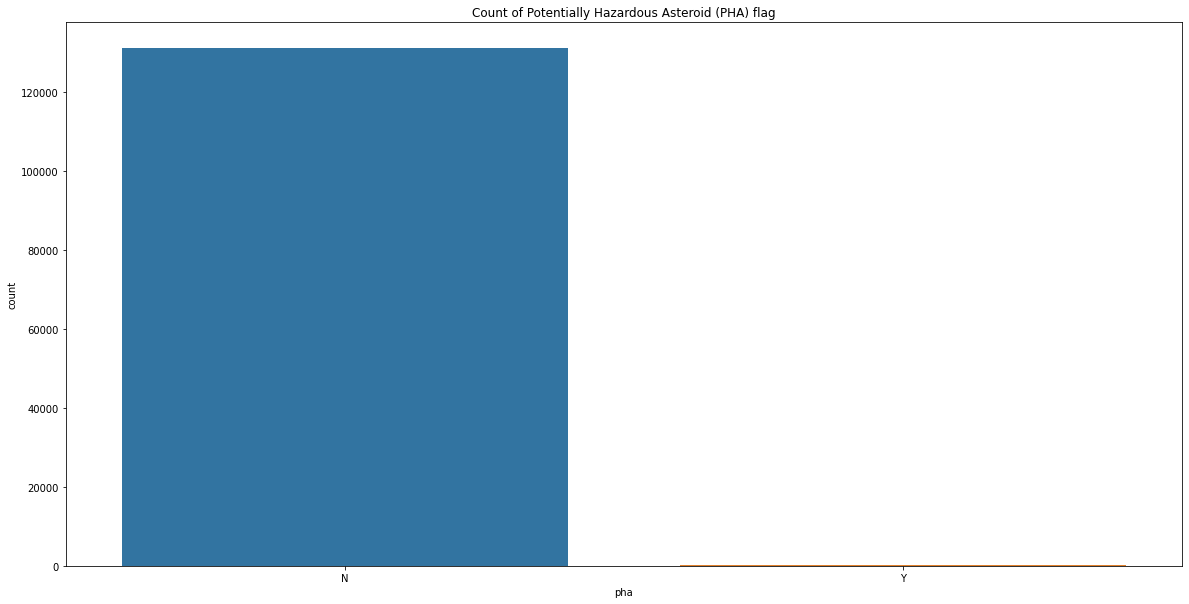

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Count of Potentially Hazardous Asteroid (PHA) flag')
sns.countplot(data=dff, x='pha');

In [ ]:
len(dff[dff['pha']=='N'])

131040

In [ ]:
len(dff[dff['pha']=='Y'])

197

In [ ]:
len(dff[dff['pha'] == 'Y'])/ len(dff[dff['pha'] == 'N']) * 100

0.15033577533577536

# beak

In [ ]:
dff['pha'] = dff['pha'].map({'Y':1,'N':0})

<ipython-input-17-0645140aba7e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['pha'] = dff['pha'].map({'Y':1,'N':0})


In [ ]:
dff= pd.get_dummies(dff)

In [ ]:
dff.columns

Index(['pha', 'H', 'diameter', 'albedo', 'e', 'a', 'q', 'i', 'om', 'w', 'ma',
       'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'rms', 'neo_N', 'neo_Y',
       'class_AMO', 'class_APO', 'class_AST', 'class_ATE', 'class_CEN',
       'class_IMB', 'class_MBA', 'class_MCA', 'class_OMB', 'class_TJN',
       'class_TNO'],
      dtype='object')

# Feature Selection RFE

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

cols = ['H', 'diameter', 'albedo', 'e', 'a', 'q', 'i', 'om', 'w', 'ma',
       'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'rms', 'neo_N', 'neo_Y',
       'class_AMO', 'class_APO', 'class_AST', 'class_ATE', 'class_CEN',
       'class_IMB', 'class_MBA', 'class_MCA', 'class_OMB', 'class_TJN',
       'class_TNO']
X = dff[cols]
y = dff['pha']
# Build a logreg and compute the feature importances
model = LogisticRegression()
# create the RFE model and select 10 attributes
rfe = RFE(model,n_features_to_select=10)
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected features: ['H', 'diameter', 'q', 'i', 'w', 'ma', 'tp', 'tp_cal', 'per', 'per_y']


In [ ]:
dff= dff[['H', 'diameter', 'q', 'i', 'w', 'ma', 'tp', 'tp_cal', 'per', 'per_y']]

In [ ]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131237 entries, 0 to 909489
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   H         131237 non-null  float64
 1   diameter  131237 non-null  float64
 2   q         131237 non-null  float64
 3   i         131237 non-null  float64
 4   w         131237 non-null  float64
 5   ma        131237 non-null  float64
 6   tp        131237 non-null  float64
 7   tp_cal    131237 non-null  float64
 8   per       131237 non-null  float64
 9   per_y     131237 non-null  float64
dtypes: float64(10)
memory usage: 11.0 MB




```
'AMO' : 'Amor',
        'APO' : 'Apollo',
        'AST' : 'Asteroid (other)',
        'ATE' : 'Aten',
        'CEN' : 'Centaur',
        'HYA' : 'Hyperbolic Asteroid',
        'IEO' : 'Atira',
        'IMB' : 'Inner Main-belt Asteroid',
        'MBA' : 'Main-belt Asteroid',
        'MCA' : 'Mars Crossing Asteroid',
        'OMB' : 'Outer Main-belt Asteroid',
        'TJN' : 'Jupiter Trojan',
        'TNO' : 'TransNeptunian Object'
```



<Axes: >

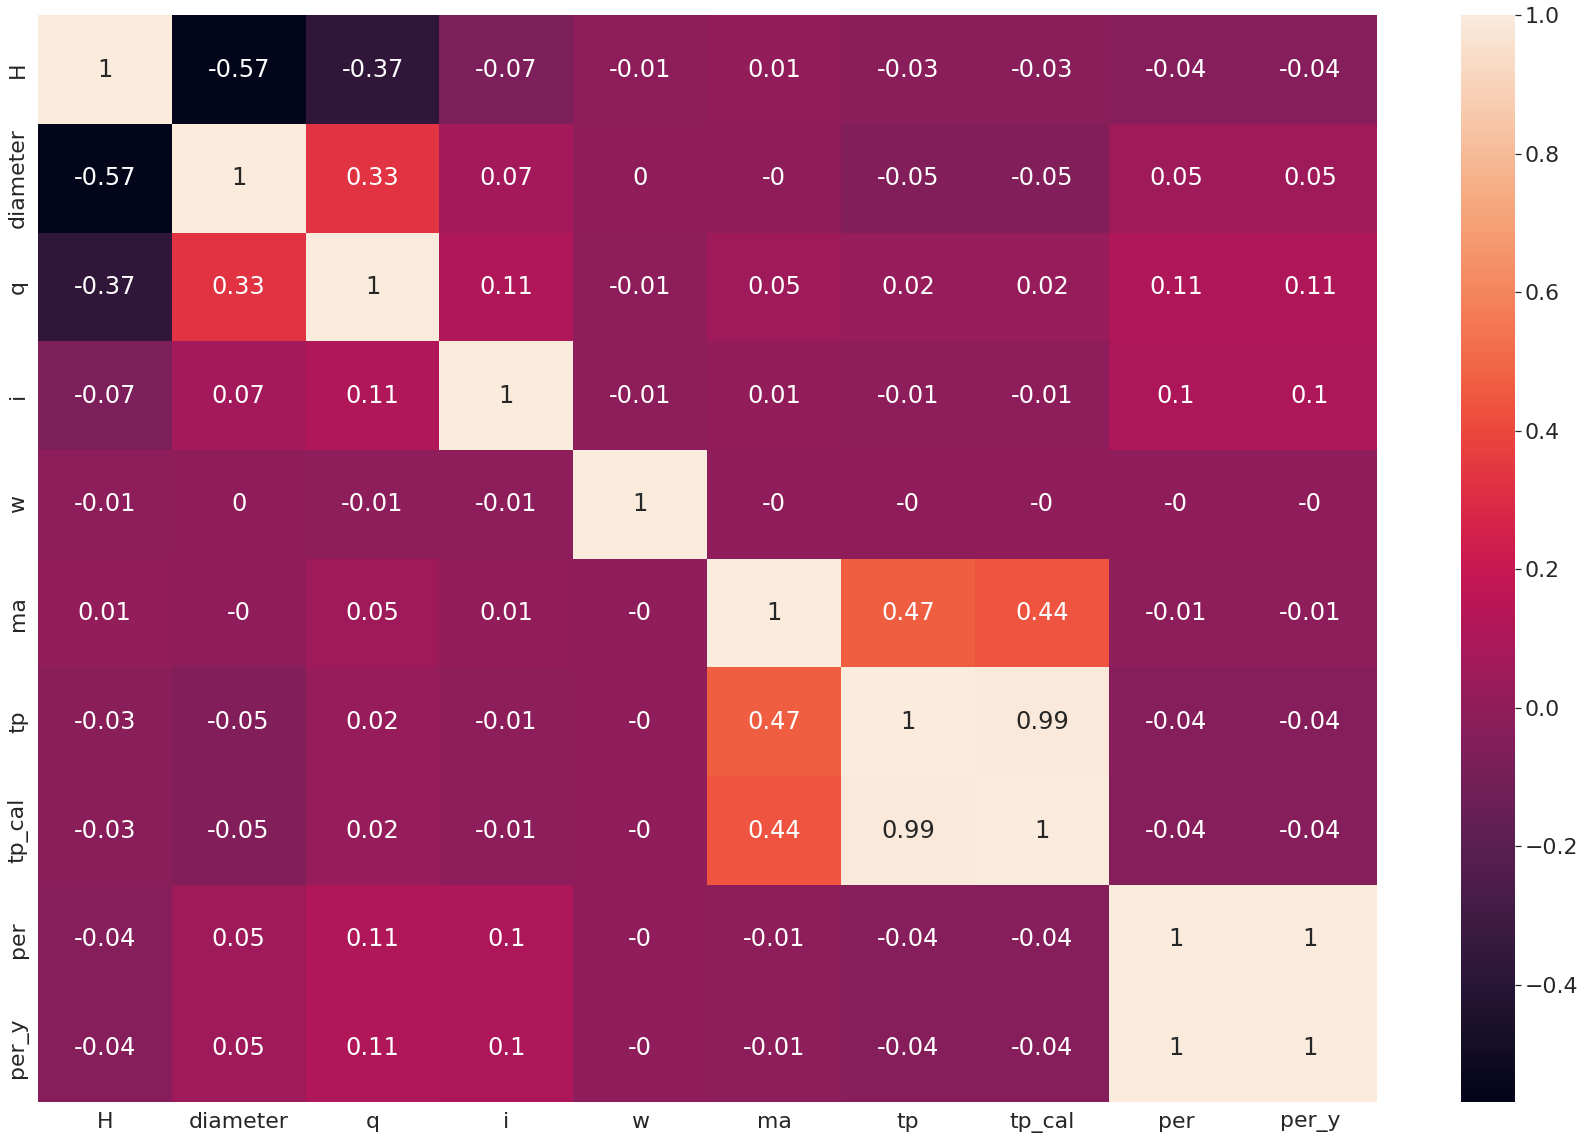

In [ ]:
plt.figure(figsize=(30,20))
sns.set(font_scale=2.0)
sns.heatmap(data=round(dff.corr(),2), annot=True)

In [ ]:
dff.shape

(131237, 10)

# Modelling

**Splitting the data**

In [ ]:
X =  dff[['H', 'diameter', 'q', 'i', 'w', 'ma', 'tp', 'tp_cal', 'per', 'per_y']]
#y = dff['pha']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


**Scaling the data**

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Fitting the data**

In [ ]:
classifier = LogisticRegression()

In [ ]:
classifier.fit(X_train, y_train)

LogisticRegression()

**Checking accuracy**

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
train_class = classifier.predict(X_train)
print(train_class)

[0 0 0 ... 0 0 0]


In [ ]:
accuracy = accuracy_score(y_train, train_class)
print('Accuracy score: ', accuracy)

Accuracy score:  0.9982800849072008


In [ ]:
## Test data
test_class = classifier.predict(X_test)
print(test_class)

[0 0 0 ... 0 0 0]


In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
y_pred = classifier.predict(X_train)

# Overfitting Case
print('---' * 45)
print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('---' * 45)



---------------------------------------------------------------------------------------------------------------------------------------
Overfitting: 

Recall Score: 0.21
Precision Score: 0.37
F1 Score: 0.27
Accuracy Score: 1.00
---------------------------------------------------------------------------------------------------------------------------------------


# Logistic Regression with ROC AUC curve metrics 

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]



In [ ]:
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

Train/Test split results:
LogisticRegression accuracy is 0.998
LogisticRegression log_loss is 0.004
LogisticRegression auc is 0.999


<ipython-input-40-7bbea496c773>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
<ipython-input-40-7bbea496c773>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')


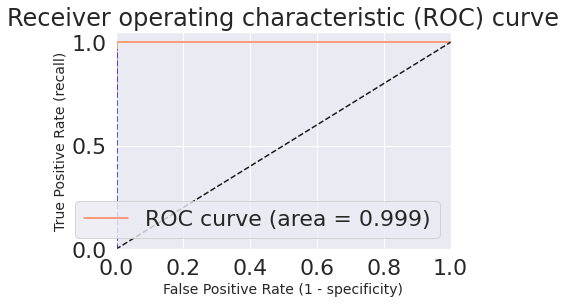

Using a threshold of 0.069 guarantees a sensitivity of 0.967 and a specificity of 0.997, i.e. a false positive rate of 0.26%.


In [ ]:
idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))